In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from dataScipy import DataScience as DS

### <span style="color:RED">1: The Google Share Price</span>

In [2]:
GOOGLE = pd.read_csv('GooglePrice.csv')

GOOGLE_DAY = list(GOOGLE['Day'])
GOOGLE_PRICE = list(GOOGLE['Price'])

GOOGLE.head()

,Day,Price
0,1,2064.879883
1,2,2070.860107
2,3,2095.169922
3,4,2031.359985
4,5,2036.859985


### <span style="color:RED">1-a</span>

In [3]:
MODEL1_GOOGLE = sm.OLS.from_formula('Price ~ Day', data=GOOGLE).fit()
MODEL1_GOOGLE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     619.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           9.84e-70
Time:                        04:23:13   Log-Likelihood:                -1633.4
No. Observations:                 253   AIC:                             3271.
Df Residuals:                     251   BIC:                             3278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2197.6246     19.501    112.694      0.000    2159.218    2236.031
Day            3.3131      0.133     24.890      0.000       3.051       3.575
==============================================================================
Omnibus:                       13.705   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.010
Skew:                          -0.590   Prob(JB):                     0.000550
Kurtosis:                       2.818   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color:RED">1-b</span>

In [4]:
print('R-squared        : ', MODEL1_GOOGLE.rsquared)
print('Prob(F-statistic): ', MODEL1_GOOGLE.f_pvalue)
print('Coef of Day      : ', MODEL1_GOOGLE.params.Day)
print('Coef Intercept   : ', MODEL1_GOOGLE.params.Intercept)

print()
print('p-values         :')
print('p-value Intercept: ', MODEL1_GOOGLE.pvalues.Intercept)
print('p-value of Day   : ', MODEL1_GOOGLE.pvalues.Day)

R-squared        :  0.7116598269511112
Prob(F-statistic):  9.838719370384408e-70
Coef of Day      :  3.3130600989616883
Coef Intercept   :  2197.624573190759

p-values         :
p-value Intercept:  5.9082498489448096e-217
p-value of Day   :  9.838719370386324e-70


### <span style="color:RED">1-c</span>

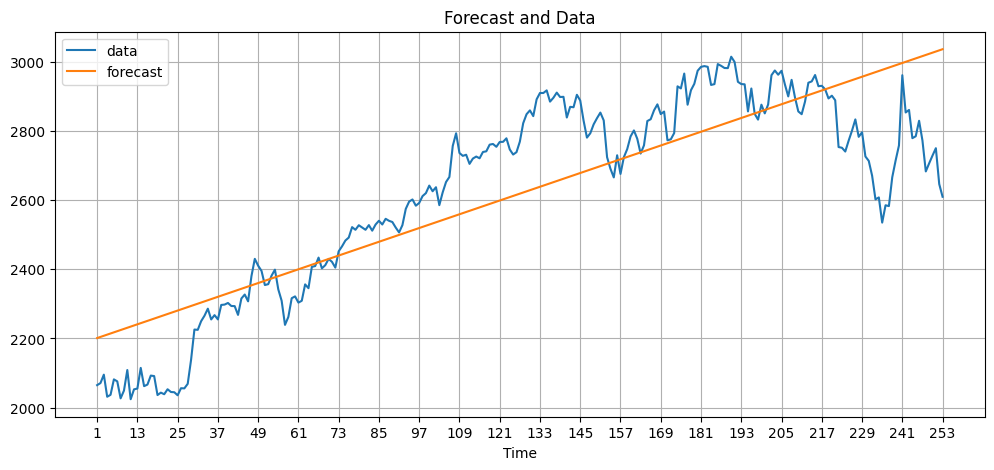

Error Summary
-------------
MSE: 23721.6199
RMSE: 154.0182


In [5]:
MODEL1_PREDICTONS_GOOGLE = list(MODEL1_GOOGLE.predict(GOOGLE))

DS.plot_forecasts(GOOGLE_PRICE, GOOGLE_DAY, MODEL1_PREDICTONS_GOOGLE, time_step=12)
DS.print_error_summary(GOOGLE_PRICE, MODEL1_PREDICTONS_GOOGLE, MSE=DS.MSE, RMSE=DS.RMSE)

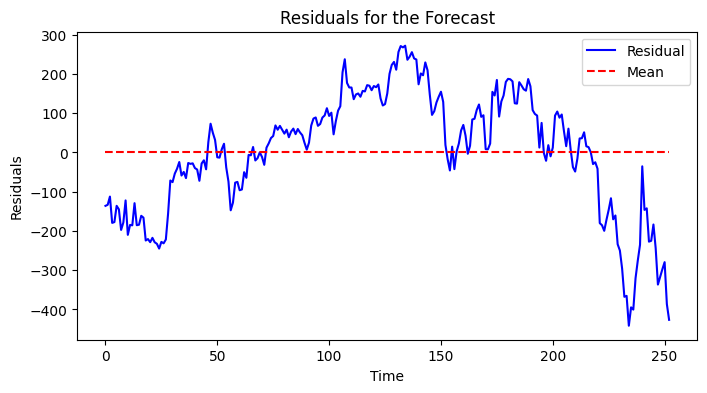

Mean of Residual:   0.0000
S.D. of Residual:   154.3235
Half Width :        19.1078   (degree of freedom = 252, Confidence Level = 0.95)
p-value :           1.0000


In [6]:
MODEL1_RESIDUALS_GOOGLE = DS.get_all_residuals(GOOGLE_PRICE, MODEL1_PREDICTONS_GOOGLE)

DS.plot_resids(MODEL1_RESIDUALS_GOOGLE)
DS.print_resids_summary(MODEL1_RESIDUALS_GOOGLE)

### <span style="color:RED">1-d</span>

In [7]:
GOOGLE['SquareRootDay'] = np.sqrt(GOOGLE['Day'])
GOOGLE['SquareDay'] = GOOGLE['Day']**2

In [8]:
MODEL2_GOOGLE = sm.OLS.from_formula('Price ~ Day + SquareRootDay + SquareDay', data=GOOGLE).fit()
MODEL2_GOOGLE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1236.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          3.40e-149
Time:                        04:23:13   Log-Likelihood:                -1440.8
No. Observations:                 253   AIC:                             2890.
Df Residuals:                     249   BIC:                             2904.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2207.3790     43.714     50.496      0.000    2121.282    2293.476
Day              19.8417      1.304     15.219      0.000      17.274      22.409
SquareRootDay  -111.2141     14.968     -7.430      0.000    -140.695     -81.733
SquareDay        -0.0432      0.002    -18.802      0.000      -0.048      -0.039
==============================================================================
Omnibus:                        9.814   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.833
Skew:                          -0.450   Prob(JB):                      0.00733
Kurtosis:                       3.352   Cond. No.                     2.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <span style="color:RED">1-e</span>

In [9]:
print('R-squared               : ', MODEL2_GOOGLE.rsquared)
print('Prob(F-statistic)       : ', MODEL2_GOOGLE.f_pvalue)
print('Coef of Day             : ', MODEL2_GOOGLE.params.Day)
print('Coef of SquareRootDay   : ', MODEL2_GOOGLE.params.SquareRootDay)
print('Coef of SquareDay       : ', MODEL2_GOOGLE.params.SquareDay)
print('Coef Intercept          : ', MODEL2_GOOGLE.params.Intercept)

print()
print('p-values                :')
print('p-value Intercept       : ', MODEL2_GOOGLE.pvalues.Intercept)
print('p-value of Day          : ', MODEL2_GOOGLE.pvalues.Day)
print('p-value of SquareRootDay: ', MODEL2_GOOGLE.pvalues.SquareRootDay)
print('p-value of SquareDay    : ', MODEL2_GOOGLE.pvalues.SquareDay)

R-squared               :  0.9370862447311153
Prob(F-statistic)       :  3.3976491777822453e-149
Coef of Day             :  19.84169345266476
Coef of SquareRootDay   :  -111.21410635838875
Coef of SquareDay       :  -0.04315206088174297
Coef Intercept          :  2207.3790094327146

p-values                :
p-value Intercept       :  7.97818027938529e-133
p-value of Day          :  2.0091302175871906e-37
p-value of SquareRootDay:  1.7356645924258318e-12
p-value of SquareDay    :  1.0973273586964736e-49


### <span style="color:RED">1-f</span>

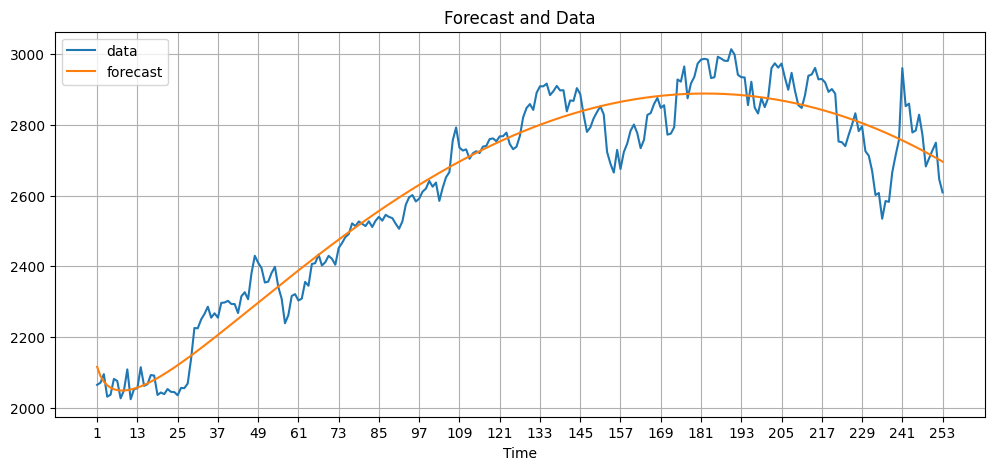

Error Summary
-------------
MSE: 5175.8871
RMSE: 71.9436


In [10]:
MODEL2_PREDICTONS_GOOGLE = list(MODEL2_GOOGLE.predict(GOOGLE))

DS.plot_forecasts(GOOGLE_PRICE, GOOGLE_DAY, MODEL2_PREDICTONS_GOOGLE, time_step=12)
DS.print_error_summary(GOOGLE_PRICE, MODEL2_PREDICTONS_GOOGLE, MSE=DS.MSE, RMSE=DS.RMSE)

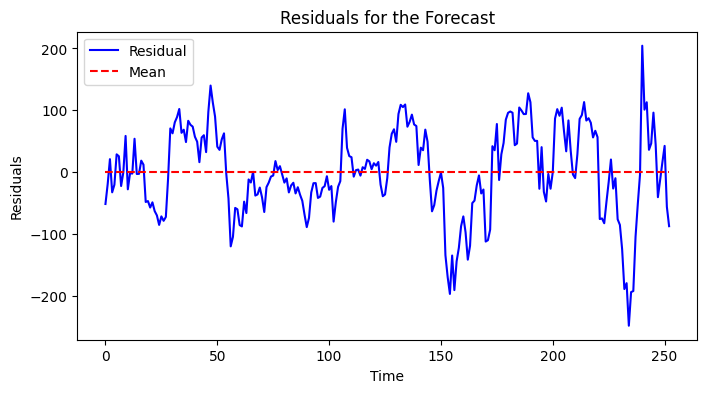

Mean of Residual:   0.0000
S.D. of Residual:   72.0862
Half Width :        8.9255   (degree of freedom = 252, Confidence Level = 0.95)
p-value :           1.0000


In [11]:
MODEL2_RESIDUALS_GOOGLE = DS.get_all_residuals(GOOGLE_PRICE, MODEL2_PREDICTONS_GOOGLE)

DS.plot_resids(MODEL2_RESIDUALS_GOOGLE)
DS.print_resids_summary(MODEL2_RESIDUALS_GOOGLE)

### <span style="color:RED">1-g</span>

In [12]:
GOOGLE['LogDay'] = np.log(GOOGLE['Day'])

In [13]:
MODEL3_GOOGLE = sm.OLS.from_formula('Price ~ Day + SquareRootDay + SquareDay + LogDay', data=GOOGLE).fit()
MODEL3_GOOGLE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     931.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          4.69e-148
Time:                        04:23:14   Log-Likelihood:                -1439.8
No. Observations:                 253   AIC:                             2890.
Df Residuals:                     248   BIC:                             2907.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2225.6083     45.448     48.971      0.000    2136.096    2315.121
Day              24.3821      3.432      7.105      0.000      17.623      31.141
SquareRootDay  -199.9354     63.822     -3.133      0.002    -325.637     -74.234
SquareDay        -0.0481      0.004    -11.574      0.000      -0.056      -0.040
LogDay          100.0696     69.986      1.430      0.154     -37.773     237.912
==============================================================================
Omnibus:                       10.979   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.183
Skew:                          -0.473   Prob(JB):                      0.00373
Kurtosis:                       3.407   Cond. No.                     6.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <span style="color:RED">1-h</span>

In [14]:
print('R-squared               : ', MODEL3_GOOGLE.rsquared)
print('Prob(F-statistic)       : ', MODEL3_GOOGLE.f_pvalue)
print('Coef of Day             : ', MODEL3_GOOGLE.params.Day)
print('Coef of SquareRootDay   : ', MODEL3_GOOGLE.params.SquareRootDay)
print('Coef of SquareDay       : ', MODEL3_GOOGLE.params.SquareDay)
print('Coef of LogDay          : ', MODEL3_GOOGLE.params.LogDay)
print('Coef Intercept          : ', MODEL3_GOOGLE.params.Intercept)

print()
print('p-values                :')
print('p-value Intercept       : ', MODEL3_GOOGLE.pvalues.Intercept)
print('p-value of Day          : ', MODEL3_GOOGLE.pvalues.Day)
print('p-value of SquareRootDay: ', MODEL3_GOOGLE.pvalues.SquareRootDay)
print('p-value of SquareDay    : ', MODEL3_GOOGLE.pvalues.SquareDay)
print('p-value of LogDay       : ', MODEL3_GOOGLE.pvalues.LogDay)

R-squared               :  0.9376006581904942
Prob(F-statistic)       :  4.693319999333625e-148
Coef of Day             :  24.382104432267273
Coef of SquareRootDay   :  -199.93542841331197
Coef of SquareDay       :  -0.04811211209508644
Coef of LogDay          :  100.06960736537661
Coef Intercept          :  2225.6082649358223

p-values                :
p-value Intercept       :  1.7113694082603234e-129
p-value of Day          :  1.2706875540031845e-11
p-value of SquareRootDay:  0.001940086643609682
p-value of SquareDay    :  4.675300083505926e-25
p-value of LogDay       :  0.15401720423595222


### <span style="color:RED">1-i</span>

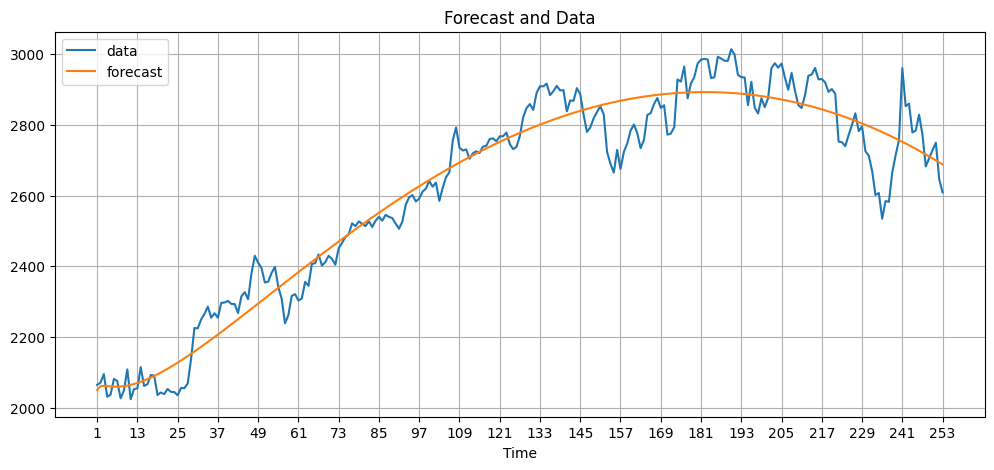

Error Summary
-------------
MSE: 5133.5666
RMSE: 71.6489


In [15]:
MODEL3_PREDICTONS_GOOGLE = list(MODEL3_GOOGLE.predict(GOOGLE))

DS.plot_forecasts(GOOGLE_PRICE, GOOGLE_DAY, MODEL3_PREDICTONS_GOOGLE, time_step=12)
DS.print_error_summary(GOOGLE_PRICE, MODEL3_PREDICTONS_GOOGLE, MSE=DS.MSE, RMSE=DS.RMSE)

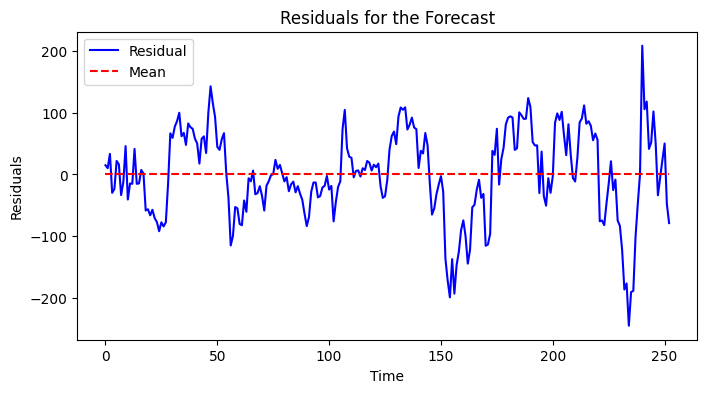

Mean of Residual:   0.0000
S.D. of Residual:   71.7909
Half Width :        8.8889   (degree of freedom = 252, Confidence Level = 0.95)
p-value :           1.0000


In [16]:
MODEL3_RESIDUALS_GOOGLE = DS.get_all_residuals(GOOGLE_PRICE, MODEL3_PREDICTONS_GOOGLE)

DS.plot_resids(MODEL3_RESIDUALS_GOOGLE)
DS.print_resids_summary(MODEL3_RESIDUALS_GOOGLE)

### <span style="color:RED">1-j</span>

In [17]:
GOOGLE_TRAIN = GOOGLE[GOOGLE['Day'] <= 181]
GOOGLE_TEST = GOOGLE[GOOGLE['Day'] > 181]

### <span style="color:RED">1-k</span>

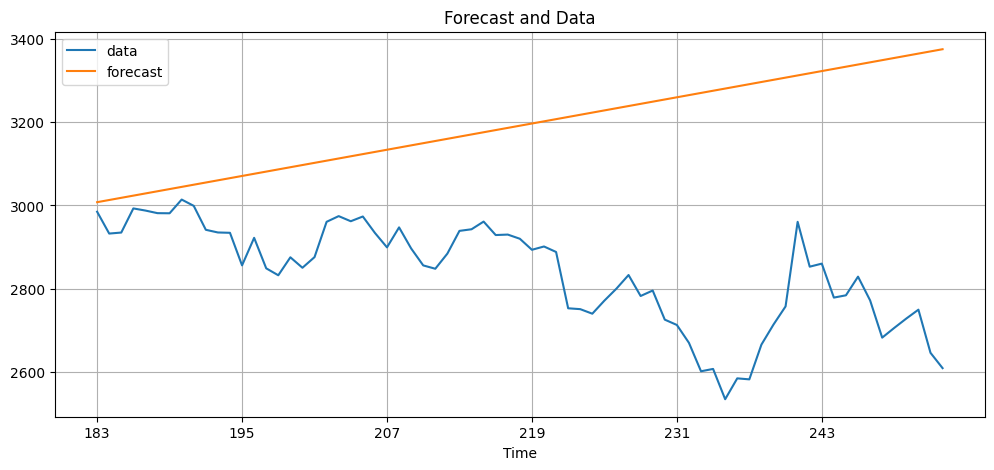

Error Summary
-------------
MSE: 171074.0129
RMSE: 413.6109


In [18]:
MODEL1_GOOGLE_TRAIN = sm.OLS.from_formula('Price ~ Day', data=GOOGLE_TRAIN).fit()

PREDICTONS1_GOOGLE_TEST = list(MODEL1_GOOGLE_TRAIN.predict(GOOGLE_TEST))

DS.plot_forecasts(GOOGLE_PRICE[182:], GOOGLE_DAY[182:], PREDICTONS1_GOOGLE_TEST, time_step=12)
DS.print_error_summary(GOOGLE_PRICE[182:], PREDICTONS1_GOOGLE_TEST, MSE=DS.MSE, RMSE=DS.RMSE)

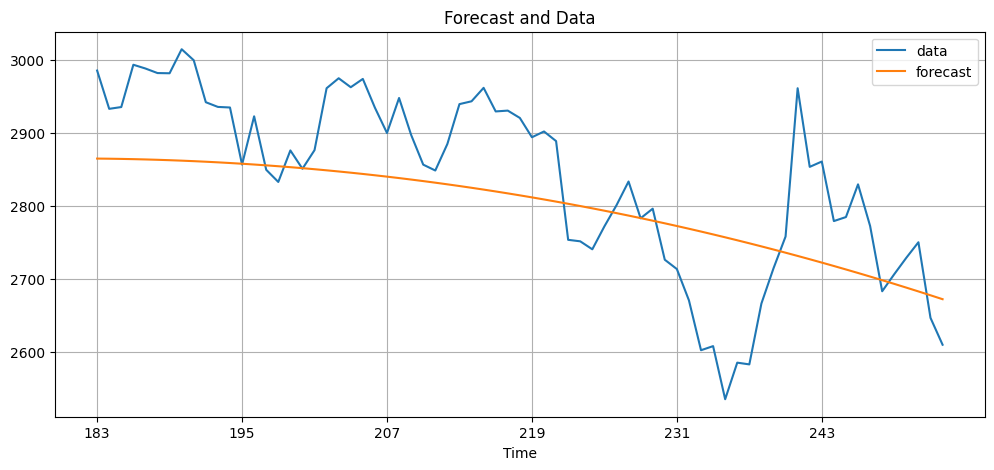

Error Summary
-------------
MSE: 9348.9174
RMSE: 96.6898


In [19]:
MODEL2_GOOGLE_TRAIN = sm.OLS.from_formula('Price ~ Day + SquareRootDay + SquareDay', data=GOOGLE_TRAIN).fit()

PREDICTONS2_GOOGLE_TEST = list(MODEL2_GOOGLE_TRAIN.predict(GOOGLE_TEST))

DS.plot_forecasts(GOOGLE_PRICE[182:], GOOGLE_DAY[182:], PREDICTONS2_GOOGLE_TEST, time_step=12)
DS.print_error_summary(GOOGLE_PRICE[182:], PREDICTONS2_GOOGLE_TEST, MSE=DS.MSE, RMSE=DS.RMSE)

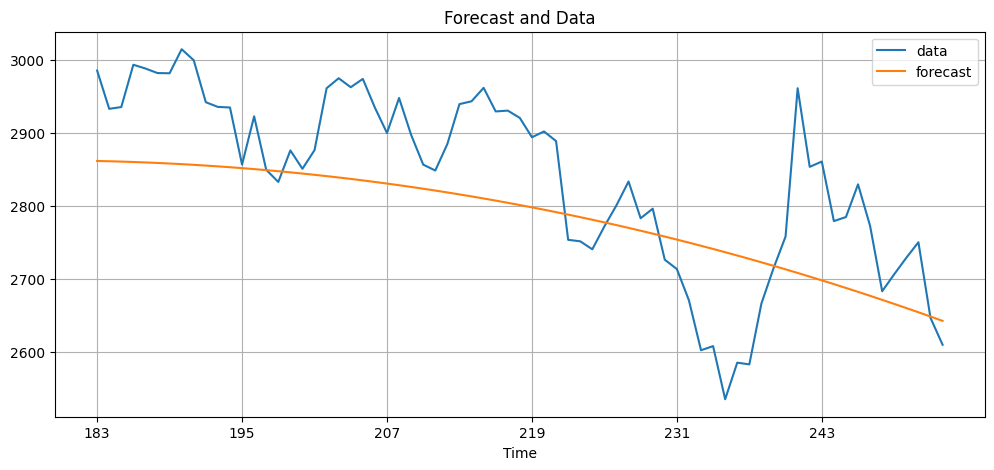

Error Summary
-------------
MSE: 10241.3399
RMSE: 101.1995


In [20]:
MODEL3_GOOGLE_TRAIN = sm.OLS.from_formula('Price ~ Day + SquareRootDay + SquareDay + LogDay', data=GOOGLE_TRAIN).fit()

PREDICTONS3_GOOGLE_TEST = list(MODEL3_GOOGLE_TRAIN.predict(GOOGLE_TEST))

DS.plot_forecasts(GOOGLE_PRICE[182:], GOOGLE_DAY[182:], PREDICTONS3_GOOGLE_TEST, time_step=12)
DS.print_error_summary(GOOGLE_PRICE[182:], PREDICTONS3_GOOGLE_TEST, MSE=DS.MSE, RMSE=DS.RMSE)

In [21]:
ALL_GOOGLE_PREDICTIONS = {
    'GOOGLE MODEL 1': PREDICTONS1_GOOGLE_TEST,
    'GOOGLE MODEL 2': PREDICTONS2_GOOGLE_TEST,
    'GOOGLE MODEL 3': PREDICTONS3_GOOGLE_TEST
}

ALL_GOOGLE_PREDICTIONS_COMPARISON_DF = DS.compare_forecasts(GOOGLE_PRICE[182:], ALL_GOOGLE_PREDICTIONS, MSE=DS.MSE, RMSE=DS.RMSE)
ALL_GOOGLE_PREDICTIONS_COMPARISON_DF

,MSE,RMSE
GOOGLE MODEL 1,171074.01,413.61
GOOGLE MODEL 2,9348.92,96.69
GOOGLE MODEL 3,10241.34,101.20


### <span style="color:RED">2: The Australian Beer Production</span>

In [22]:
AUSBEER = pd.read_csv('ausbeer_dummies.csv')

AUSBEER_MONTH = list(AUSBEER['Month'])
AUSBEER_PROD = list(AUSBEER['Production'])

AUSBEER.head()

,Month,Production,t,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11
0,1,164,1,1,0,0,0,0,0,0,0,0,0,0
1,2,148,2,0,1,0,0,0,0,0,0,0,0,0
2,3,152,3,0,0,1,0,0,0,0,0,0,0,0
3,4,144,4,0,0,0,1,0,0,0,0,0,0,0
4,5,155,5,0,0,0,0,1,0,0,0,0,0,0


### <span style="color:RED">2-a</span>

In [23]:
MODEL1_AUSBEER = sm.OLS.from_formula('Production ~ Month + M1 + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10 + M11', data=AUSBEER).fit()
MODEL1_AUSBEER.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     18.30
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           3.97e-13
Time:                        04:23:15   Log-Likelihood:                -194.93
No. Observations:                  56   AIC:                             415.9
Df Residuals:                      43   BIC:                             442.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    192.9750      5.015     38.477      0.000     182.861     203.089
Month         -0.2158      0.075     -2.887      0.006      -0.367      -0.065
M1           -39.7792      6.030     -6.597      0.000     -51.940     -27.619
M2           -48.5633      6.026     -8.059      0.000     -60.715     -36.411
M3           -30.9475      6.023     -5.139      0.000     -43.093     -18.802
M4           -46.7317      6.020     -7.762      0.000     -58.873     -34.591
M5           -46.1158      6.019     -7.662      0.000     -58.254     -33.978
M6           -58.5000      6.018     -9.720      0.000     -70.637     -46.363
M7           -51.8842      6.019     -8.620      0.000     -64.022     -39.746
M8           -42.2683      6.020     -7.021      0.000     -54.409     -30.127
M9           -46.6475      6.348     -7.349      0.000     -59.449     -33.846
M10          -19.6817      6.346     -3.102      0.003     -32.479      -6.884
M11           -2.9658      6.344     -0.467      0.643     -15.760       9.829
==============================================================================
Omnibus:                        1.949   Durbin-Watson:                   2.427
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.833
Skew:                           0.352   Prob(JB):                        0.400
Kurtosis:                       2.461   Cond. No.                         439.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color:RED">2-b</span>

In [24]:
print('R-squared               : ', MODEL1_AUSBEER.rsquared)
print('Prob(F-statistic)       : ', MODEL1_AUSBEER.f_pvalue)
print('Coef Intercept          : ', MODEL1_AUSBEER.params.Intercept)
print('Coef of Month           : ', MODEL1_AUSBEER.params.Month)
print('Coef of M1              : ', MODEL1_AUSBEER.params.M1)
print('Coef of M2              : ', MODEL1_AUSBEER.params.M2)
print('Coef of M3              : ', MODEL1_AUSBEER.params.M3)
print('Coef of M4              : ', MODEL1_AUSBEER.params.M4)
print('Coef of M5              : ', MODEL1_AUSBEER.params.M5)
print('Coef of M6              : ', MODEL1_AUSBEER.params.M6)
print('Coef of M7              : ', MODEL1_AUSBEER.params.M7)
print('Coef of M8              : ', MODEL1_AUSBEER.params.M8)
print('Coef of M9              : ', MODEL1_AUSBEER.params.M9)
print('Coef of M10             : ', MODEL1_AUSBEER.params.M10)
print('Coef of M11             : ', MODEL1_AUSBEER.params.M11)

print()
print('p-values                :')
print('p-value of Intercept    : ', MODEL1_AUSBEER.pvalues.Intercept)
print('p-value of Month        : ', MODEL1_AUSBEER.pvalues.Month)
print('p-value of M1           : ', MODEL1_AUSBEER.pvalues.M1)
print('p-value of M2           : ', MODEL1_AUSBEER.pvalues.M2)
print('p-value of M3           : ', MODEL1_AUSBEER.pvalues.M3)
print('p-value of M4           : ', MODEL1_AUSBEER.pvalues.M4)
print('p-value of M5           : ', MODEL1_AUSBEER.pvalues.M5)
print('p-value of M6           : ', MODEL1_AUSBEER.pvalues.M6)
print('p-value of M7           : ', MODEL1_AUSBEER.pvalues.M7)
print('p-value of M8           : ', MODEL1_AUSBEER.pvalues.M8)
print('p-value of M9           : ', MODEL1_AUSBEER.pvalues.M9)
print('p-value of M10          : ', MODEL1_AUSBEER.pvalues.M10)
print('p-value of M11          : ', MODEL1_AUSBEER.pvalues.M11)

R-squared               :  0.8362454429553052
Prob(F-statistic)       :  3.97159559050184e-13
Coef Intercept          :  192.97499999999997
Coef of Month           :  -0.21583333333333213
Coef of M1              :  -39.77916666666658
Coef of M2              :  -48.56333333333328
Coef of M3              :  -30.947499999999906
Coef of M4              :  -46.731666666666655
Coef of M5              :  -46.115833333333285
Coef of M6              :  -58.499999999999986
Coef of M7              :  -51.88416666666663
Coef of M8              :  -42.26833333333332
Coef of M9              :  -46.647500000000036
Coef of M10             :  -19.68166666666662
Coef of M11             :  -2.965833333333194

p-values                :
p-value of Intercept    :  5.985401632305901e-35
p-value of Month        :  0.0060650838920652305
p-value of M1           :  4.948280727204005e-08
p-value of M2           :  3.9082148247792e-10
p-value of M3           :  6.421140458188757e-06
p-value of M4           :  1.03

### <span style="color:RED">2-c</span>

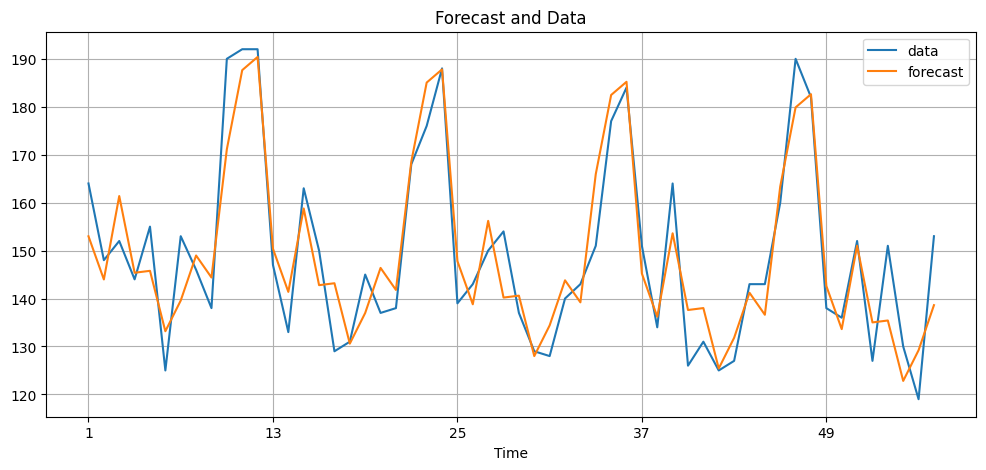

Error Summary
-------------
MSE: 61.8052
RMSE: 7.8616


In [25]:
MODEL1_PREDICTONS_AUSBEER = list(MODEL1_AUSBEER.predict(AUSBEER))

DS.plot_forecasts(AUSBEER_PROD, AUSBEER_MONTH, MODEL1_PREDICTONS_AUSBEER, time_step=12)
DS.print_error_summary(AUSBEER_PROD, MODEL1_PREDICTONS_AUSBEER, MSE=DS.MSE, RMSE=DS.RMSE)

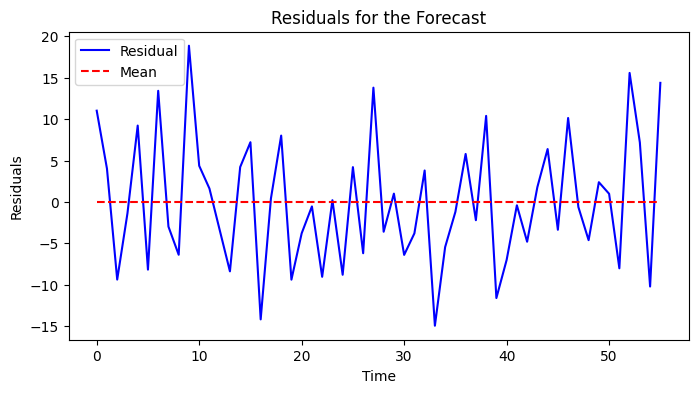

Mean of Residual:   -0.0000
S.D. of Residual:   7.9328
Half Width :        2.1244   (degree of freedom = 55, Confidence Level = 0.95)
p-value :           1.0000


In [26]:
MODEL1_RESIDUALS_AUSBEER = DS.get_all_residuals(AUSBEER_PROD, MODEL1_PREDICTONS_AUSBEER)

DS.plot_resids(MODEL1_RESIDUALS_AUSBEER)
DS.print_resids_summary(MODEL1_RESIDUALS_AUSBEER)

### <span style="color:RED">2-d</span>

In [27]:
MODEL2_AUSBEER = sm.OLS.from_formula('Production ~ Month + M1 + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10', data=AUSBEER).fit()
MODEL2_AUSBEER.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     20.30
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           9.46e-14
Time:                        04:23:15   Log-Likelihood:                -195.07
No. Observations:                  56   AIC:                             414.1
Df Residuals:                      44   BIC:                             438.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    191.4799      3.829     50.010      0.000     183.763     199.196
Month         -0.2154      0.074     -2.907      0.006      -0.365      -0.066
M1           -38.2944      5.080     -7.538      0.000     -48.532     -28.056
M2           -47.0790      5.076     -9.275      0.000     -57.308     -36.850
M3           -29.4636      5.072     -5.809      0.000     -39.686     -19.241
M4           -45.2481      5.070     -8.924      0.000     -55.466     -35.030
M5           -44.6327      5.069     -8.805      0.000     -54.849     -34.417
M6           -57.0173      5.069    -11.248      0.000     -67.233     -46.801
M7           -50.4019      5.070     -9.941      0.000     -60.620     -40.184
M8           -40.7864      5.072     -8.041      0.000     -51.009     -30.564
M9           -45.1636      5.448     -8.290      0.000     -56.144     -34.184
M10          -18.1981      5.446     -3.341      0.002     -29.174      -7.222
==============================================================================
Omnibus:                        1.741   Durbin-Watson:                   2.440
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.628
Skew:                           0.312   Prob(JB):                        0.443
Kurtosis:                       2.445   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color:RED">2-e</span>

In [28]:
print('R-squared               : ', MODEL2_AUSBEER.rsquared)
print('Prob(F-statistic)       : ', MODEL2_AUSBEER.f_pvalue)
print('Coef Intercept          : ', MODEL2_AUSBEER.params.Intercept)
print('Coef of Month           : ', MODEL2_AUSBEER.params.Month)
print('Coef of M1              : ', MODEL2_AUSBEER.params.M1)
print('Coef of M2              : ', MODEL2_AUSBEER.params.M2)
print('Coef of M3              : ', MODEL2_AUSBEER.params.M3)
print('Coef of M4              : ', MODEL2_AUSBEER.params.M4)
print('Coef of M5              : ', MODEL2_AUSBEER.params.M5)
print('Coef of M6              : ', MODEL2_AUSBEER.params.M6)
print('Coef of M7              : ', MODEL2_AUSBEER.params.M7)
print('Coef of M8              : ', MODEL2_AUSBEER.params.M8)
print('Coef of M9              : ', MODEL2_AUSBEER.params.M9)
print('Coef of M10             : ', MODEL2_AUSBEER.params.M10)

print()
print('p-values                :')
print('p-value of Intercept    : ', MODEL2_AUSBEER.pvalues.Intercept)
print('p-value of Month        : ', MODEL2_AUSBEER.pvalues.Month)
print('p-value of M1           : ', MODEL2_AUSBEER.pvalues.M1)
print('p-value of M2           : ', MODEL2_AUSBEER.pvalues.M2)
print('p-value of M3           : ', MODEL2_AUSBEER.pvalues.M3)
print('p-value of M4           : ', MODEL2_AUSBEER.pvalues.M4)
print('p-value of M5           : ', MODEL2_AUSBEER.pvalues.M5)
print('p-value of M6           : ', MODEL2_AUSBEER.pvalues.M6)
print('p-value of M7           : ', MODEL2_AUSBEER.pvalues.M7)
print('p-value of M8           : ', MODEL2_AUSBEER.pvalues.M8)
print('p-value of M9           : ', MODEL2_AUSBEER.pvalues.M9)
print('p-value of M10          : ', MODEL2_AUSBEER.pvalues.M10)

R-squared               :  0.8354132123803122
Prob(F-statistic)       :  9.458236488924511e-14
Coef Intercept          :  191.47993334259138
Coef of Month           :  -0.21542146924038683
Coef of M1              :  -38.2943966115817
Coef of M2              :  -47.07897514234139
Coef of M3              :  -29.463553673100918
Coef of M4              :  -45.248132203860635
Coef of M5              :  -44.63271073462019
Coef of M6              :  -57.017289265379866
Coef of M7              :  -50.4018677961395
Coef of M8              :  -40.78644632689905
Coef of M9              :  -45.16355367310102
Coef of M10             :  -18.19813220386058

p-values                :
p-value of Intercept    :  2.051952953308124e-40
p-value of Month        :  0.005688547578352592
p-value of M1           :  1.873016015316023e-09
p-value of M2           :  6.447426862779879e-12
p-value of M3           :  6.444612889352726e-07
p-value of M4           :  1.9788559607599702e-11
p-value of M5           :  2.

### <span style="color:RED">2-f</span>

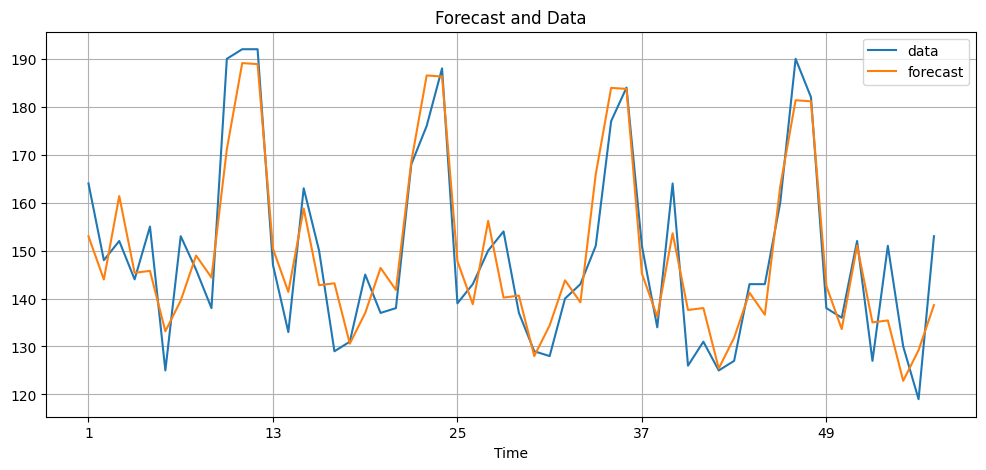

Error Summary
-------------
MSE: 62.1193
RMSE: 7.8816


In [29]:
MODEL2_PREDICTONS_AUSBEER = list(MODEL2_AUSBEER.predict(AUSBEER))

DS.plot_forecasts(AUSBEER_PROD, AUSBEER_MONTH, MODEL2_PREDICTONS_AUSBEER, time_step=12)
DS.print_error_summary(AUSBEER_PROD, MODEL2_PREDICTONS_AUSBEER, MSE=DS.MSE, RMSE=DS.RMSE)

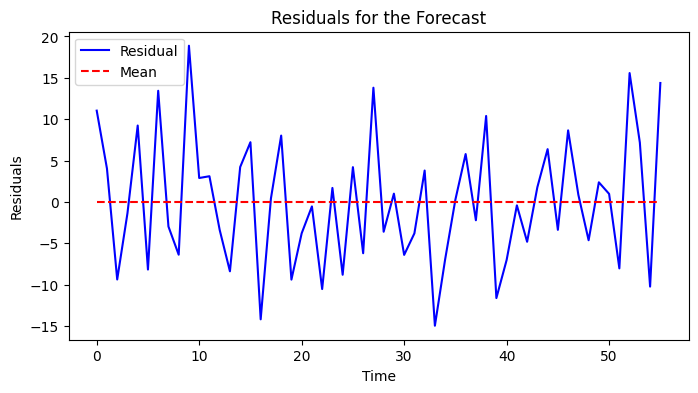

Mean of Residual:   0.0000
S.D. of Residual:   7.9529
Half Width :        2.1298   (degree of freedom = 55, Confidence Level = 0.95)
p-value :           1.0000


In [30]:
MODEL2_RESIDUALS_AUSBEER = DS.get_all_residuals(AUSBEER_PROD, MODEL2_PREDICTONS_AUSBEER)

DS.plot_resids(MODEL2_RESIDUALS_AUSBEER)
DS.print_resids_summary(MODEL2_RESIDUALS_AUSBEER)

### <span style="color:RED">EXTRA-1</span>

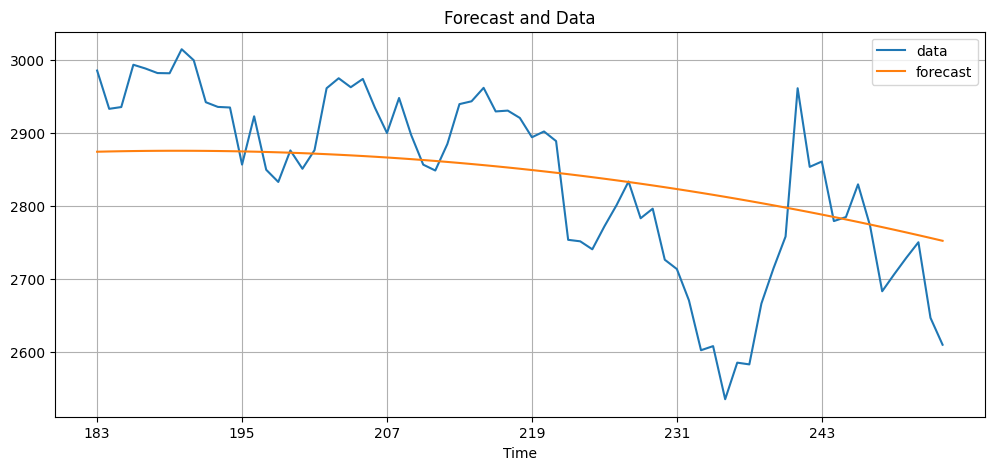

Error Summary
-------------
MSE: 9588.1916
RMSE: 97.9193


In [31]:
MODEL4_GOOGLE_TRAIN = sm.OLS.from_formula('Price ~ Day + LogDay + SquareDay', data=GOOGLE_TRAIN).fit()

PREDICTONS4_GOOGLE_TEST = list(MODEL4_GOOGLE_TRAIN.predict(GOOGLE_TEST))

DS.plot_forecasts(GOOGLE_PRICE[182:], GOOGLE_DAY[182:], PREDICTONS4_GOOGLE_TEST, time_step=12)
DS.print_error_summary(GOOGLE_PRICE[182:], PREDICTONS4_GOOGLE_TEST, MSE=DS.MSE, RMSE=DS.RMSE)

### <span style="color:RED">EXTRA-2</span>

In [32]:
AUSBEER_TRAIN = AUSBEER[AUSBEER['Month'] <= 41]
AUSBEER_TEST = AUSBEER[AUSBEER['Month'] > 41]

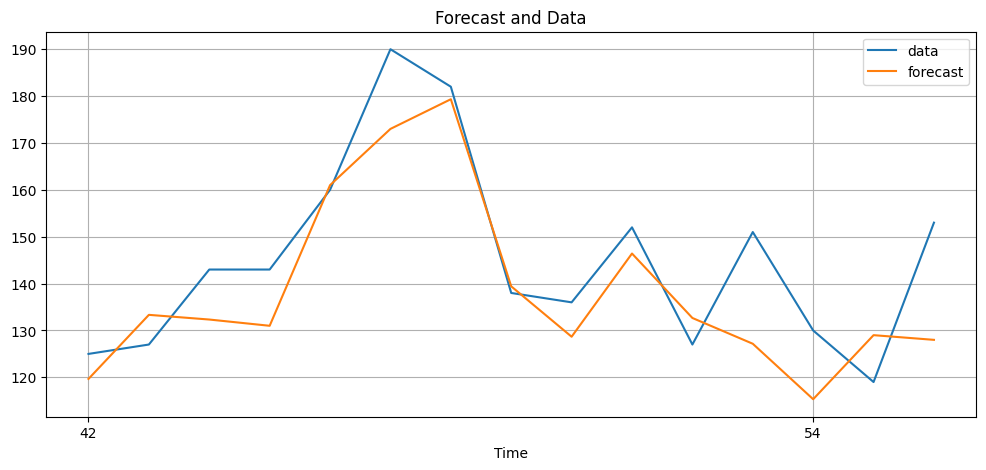

Error Summary
-------------
MSE: 150.0435
RMSE: 12.2492


In [33]:
MODEL1_AUSBEER_TRAIN = sm.OLS.from_formula('Production ~ Month + M1 + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10 + M11', data=AUSBEER_TRAIN).fit()

PREDICTONS1_AUSBEER_TEST = list(MODEL1_AUSBEER_TRAIN.predict(AUSBEER_TEST))

DS.plot_forecasts(AUSBEER_PROD[41:], AUSBEER_MONTH[41:], PREDICTONS1_AUSBEER_TEST, time_step=12)
DS.print_error_summary(AUSBEER_PROD[41:], PREDICTONS1_AUSBEER_TEST, MSE=DS.MSE, RMSE=DS.RMSE)

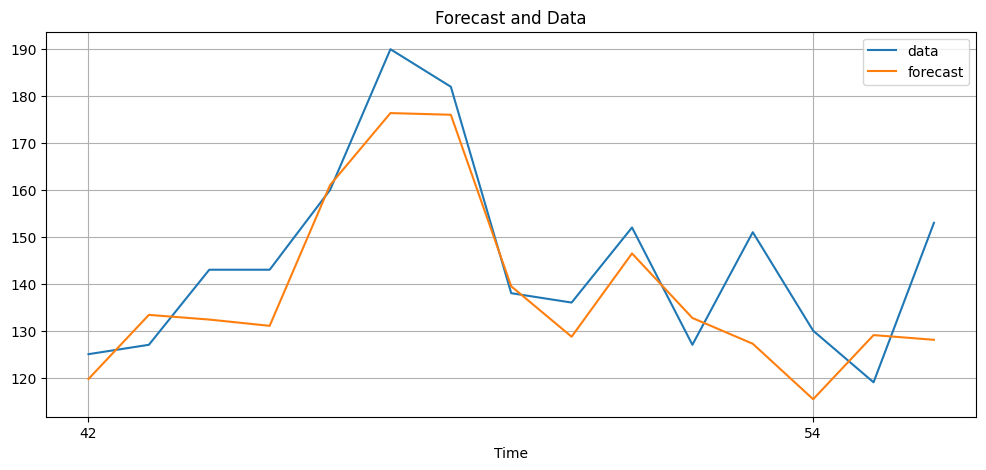

Error Summary
-------------
MSE: 144.4466
RMSE: 12.0186


In [34]:
MODEL2_AUSBEER_TRAIN = sm.OLS.from_formula('Production ~ Month + M1 + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10', data=AUSBEER_TRAIN).fit()

PREDICTONS2_AUSBEER_TEST = list(MODEL2_AUSBEER_TRAIN.predict(AUSBEER_TEST))

DS.plot_forecasts(AUSBEER_PROD[41:], AUSBEER_MONTH[41:], PREDICTONS2_AUSBEER_TEST, time_step=12)
DS.print_error_summary(AUSBEER_PROD[41:], PREDICTONS2_AUSBEER_TEST, MSE=DS.MSE, RMSE=DS.RMSE)

In [35]:
ALL_AUSBEER_PREDICTONS = {
    'BEER MODEL 1': PREDICTONS1_AUSBEER_TEST,
    'BEER MODEL 2': PREDICTONS2_AUSBEER_TEST
}

ALL_AUSBEER_PREDICTONS_COMPARISON_DF = DS.compare_forecasts(AUSBEER_PROD[41:], ALL_AUSBEER_PREDICTONS, MSE=DS.MSE, RMSE=DS.RMSE)
ALL_AUSBEER_PREDICTONS_COMPARISON_DF

,MSE,RMSE
BEER MODEL 1,150.04,12.25
BEER MODEL 2,144.45,12.02
